# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./Profissao- Cientista de Dados_M10_support material.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [23]:
df1 = df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'mau']]
df1

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,1,36,3.575342,3.0,3369.24,False
1,0,42,0.860274,2.0,6096.14,False
2,2,31,8.065753,4.0,5658.98,False
3,0,50,1.208219,2.0,7246.69,False
4,0,52,13.873973,2.0,4017.37,False
...,...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29,False
14996,1,30,12.079452,3.0,2519.18,False
14997,0,40,2.161644,2.0,1586.85,False
14998,0,47,3.295890,2.0,6975.39,False


In [24]:
df1.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.009544
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,-0.011087
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,-0.047722
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,-0.001555
renda,0.009567,0.042570,0.394235,0.020977,1.000000,-0.011577
mau,0.009544,-0.011087,-0.047722,-0.001555,-0.011577,1.000000


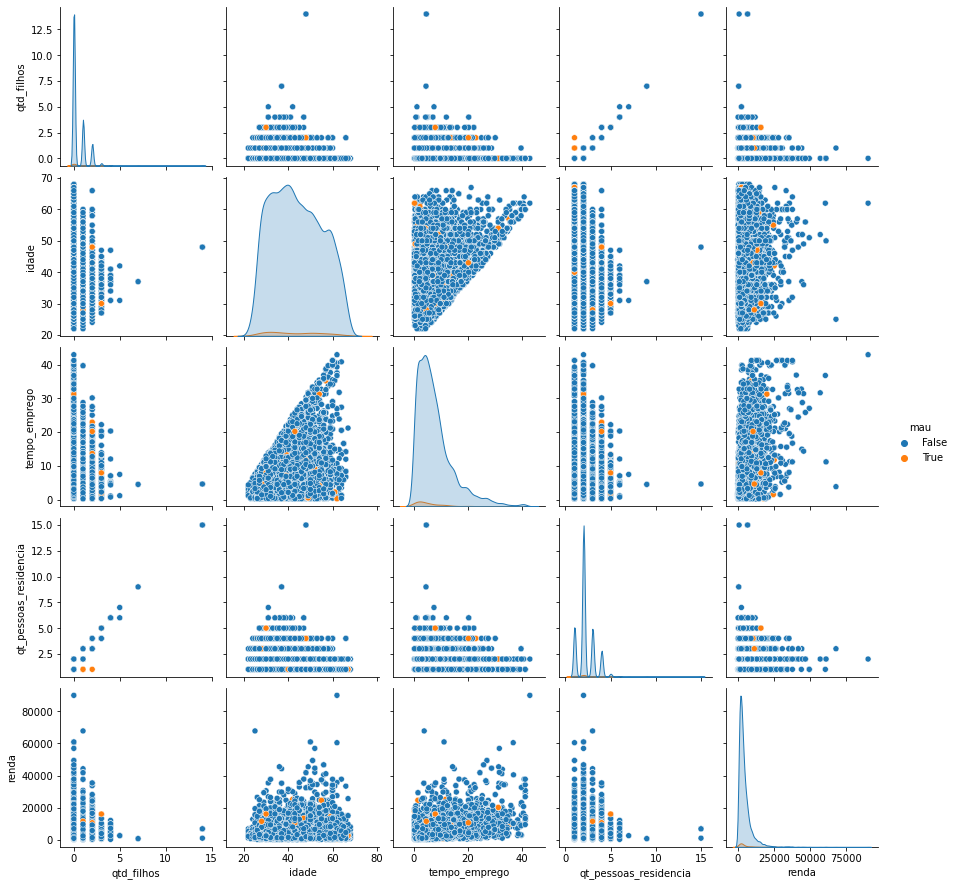

In [25]:
df2 = sns.pairplot(df1, hue='mau')

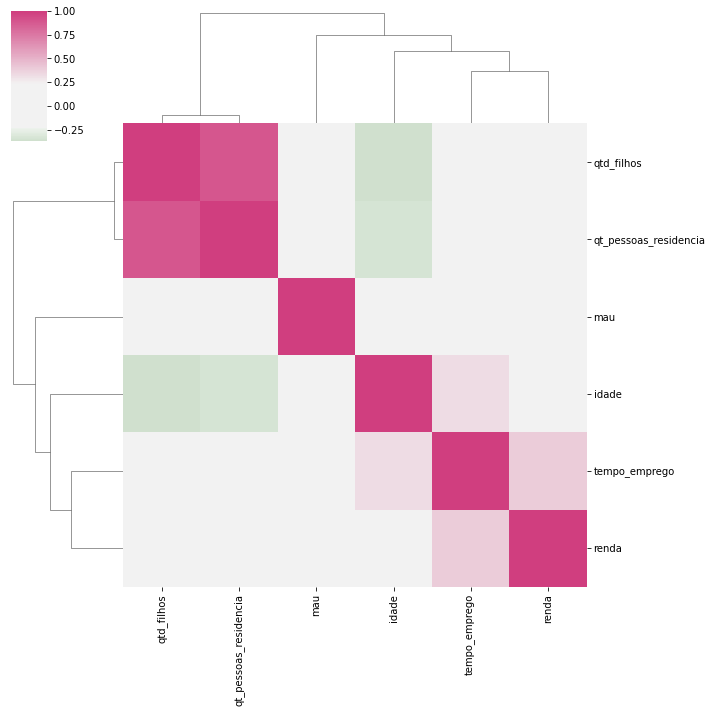

In [28]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(df1.corr(), figsize=(10, 10), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='renda', ylabel='idade'>

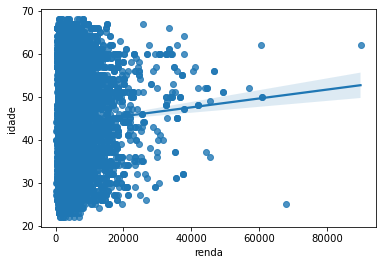

In [39]:
df3 = df[['renda', 'idade', 'tempo_emprego']]
sns.regplot(x=df[['renda']], y=df[['idade']])

<AxesSubplot:xlabel='renda', ylabel='tempo_emprego'>

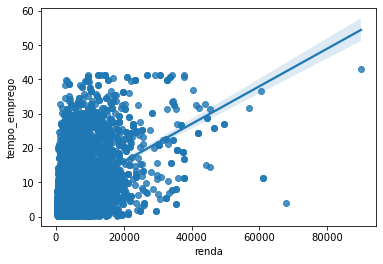

In [41]:
sns.regplot(x=df[['renda']], y=df[['tempo_emprego']], dropna = True)

3) Na su aopinião, há outliers na variável renda?

Sim, pois tanto a idade quanto tempo de emprego tem números muito fora da média.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [56]:
df_renda = df3.copy()
df_renda.sort_values('renda', ascending=True).head(15)

,renda,idade,tempo_emprego
9804,159.90,42,0.975342
12416,187.69,27,4.767123
14232,194.85,44,1.504110
2723,238.38,40,1.898630
6613,238.38,40,1.898630
5906,247.73,28,2.178082
3427,251.28,30,0.369863
6632,260.68,54,1.789041
1837,292.62,58,NaN
13798,295.31,44,1.432877


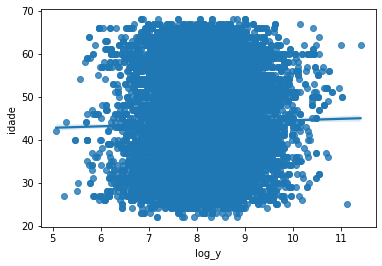

In [73]:
df_renda['log_y'] = np.log(df_renda['renda'])

_ = sns.regplot(x='log_y', y='idade', data = df_renda)

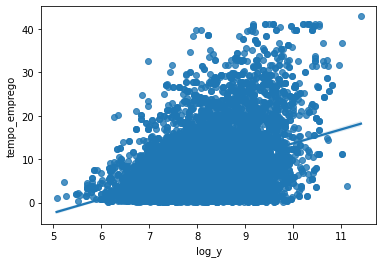

In [72]:
__ = sns.regplot(x='log_y', y='tempo_emprego', data = df_renda)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Na minha opinião a aplicação do LOG piorou a análise, pois apesar de os outliers não estarem visíveis, os dados ficaram muito clusterizados. Talvez pela quantidade de dados isto ocorra, se pudessemos extrair um sample e aplicar o LOG poderia ficar melhor, mas desta forma, não seria tão acurado. 